In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Class\Credit Risk\risk_analytics_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
colname=["Gender","Married","Dependents","Self_Employed","Loan_Amount_Term"]

for x in colname:
    df[x].fillna(df[x].mode()[0],inplace=True)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['LoanAmount'].fillna(round(df['LoanAmount'].mean(), 0), inplace=True)
print(df.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [9]:
df['Credit_History'].fillna(value=0,inplace=True)
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [10]:
df_rev = pd.DataFrame(df)

In [11]:
df_rev.shape

(614, 13)

In [12]:
df_rev.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118202,0.030430,0.163108,-0.103864,-0.017523
ApplicantIncome,0.118202,1.000000,-0.116605,0.565621,-0.046531,0.006986
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187863,-0.059383,-0.058795
LoanAmount,0.163108,0.565621,0.187863,1.000000,0.036486,-0.034518
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.036486,1.000000,0.002361
Credit_History,-0.017523,0.006986,-0.058795,-0.034518,0.002361,1.000000


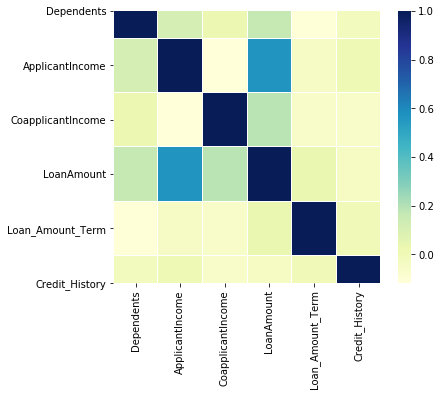

In [13]:
corrmat = df_rev.corr()

f, ax = plt.subplots(figsize =(6, 5)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [14]:
colname =[]
for j in df_rev.columns[:]:
    if df_rev[j].dtype == 'object':
        colname.append(j)
colname

['Loan_ID',
 'Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [15]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for j in colname:
    df_rev[j] = le.fit_transform(df_rev[j].astype(str))

In [16]:
df_rev.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [17]:
data1 = pd.DataFrame(df)
data1.drop(['Loan_Status'], axis = 1, inplace = True)

In [18]:
data2 = pd.DataFrame(df_rev['Loan_Status'])

In [19]:
print(data1.shape)
print(data2.shape)

(614, 12)
(614, 1)


In [20]:
import statsmodels.api as sm
from scipy import stats

X = pd.DataFrame(data1)
y = pd.DataFrame(data2)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Loan_Status   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     13.06
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           4.93e-24
Time:                        22:21:37   Log-Likelihood:                -328.07
No. Observations:                 614   AIC:                             682.1
Df Residuals:                     601   BIC:                             739.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3103      0.12

In [21]:
#We cannot drop variables based on the P-Value because all the important variables have [P-value>0.05] significance

In [22]:
X = df_rev.values[:,:-1]
Y =df_rev.values[:,-1]
Y = Y.astype(int)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
print(X)

[[-1.72923217  0.47234264 -1.37208932 ...  0.2732313   0.54095432
   1.22329839]
 [-1.7235903   0.47234264  0.72881553 ...  0.2732313   0.54095432
  -1.31851281]
 [-1.71794844  0.47234264  0.72881553 ...  0.2732313   0.54095432
   1.22329839]
 ...
 [ 1.71794844  0.47234264  0.72881553 ...  0.2732313   0.54095432
   1.22329839]
 [ 1.7235903   0.47234264  0.72881553 ...  0.2732313   0.54095432
   1.22329839]
 [ 1.72923217 -2.11710719 -1.37208932 ...  0.2732313  -1.84858491
  -0.04760721]]


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

# Logistic Regression (Basic Model)

In [25]:
#Building the model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression() # creating the model object
#Fitting the training data in the model
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

print(classifier.coef_)
print(classifier.intercept_)

[[ 0.05679432 -0.10379083  0.31986825  0.04585003 -0.20673371 -0.04227105
   0.03373491 -0.14231227 -0.04950089 -0.04778315  0.93373415  0.0589516 ]]
[0.87693057]


In [26]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[ 20  32]
 [ 12 121]]
Classification report: 
              precision    recall  f1-score   support

           0       0.62      0.38      0.48        52
           1       0.79      0.91      0.85       133

    accuracy                           0.76       185
   macro avg       0.71      0.65      0.66       185
weighted avg       0.74      0.76      0.74       185

Accuracy of the model: 0.7621621621621621


In [27]:
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.6471949103528051
[0.         0.61538462 1.        ]
[0.         0.90977444 1.        ]


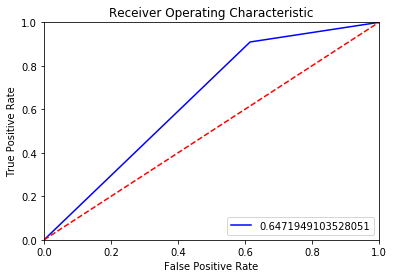

In [28]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# adjusting Threshold (Tuning technique) - Logistic Regression 

In [29]:
#Store the predicted probabilities
Y_pred_prob = classifier.predict_proba(X_test)
print(Y_pred_prob)

[[0.301495   0.698505  ]
 [0.75621947 0.24378053]
 [0.16567512 0.83432488]
 [0.20062858 0.79937142]
 [0.26953277 0.73046723]
 [0.26003982 0.73996018]
 [0.61423832 0.38576168]
 [0.16200043 0.83799957]
 [0.17398105 0.82601895]
 [0.22429015 0.77570985]
 [0.16909444 0.83090556]
 [0.15633186 0.84366814]
 [0.13511662 0.86488338]
 [0.18386945 0.81613055]
 [0.77621071 0.22378929]
 [0.38039887 0.61960113]
 [0.13912257 0.86087743]
 [0.14169276 0.85830724]
 [0.32335597 0.67664403]
 [0.26156638 0.73843362]
 [0.15444668 0.84555332]
 [0.13337352 0.86662648]
 [0.17186032 0.82813968]
 [0.66017155 0.33982845]
 [0.22075476 0.77924524]
 [0.16897008 0.83102992]
 [0.14474968 0.85525032]
 [0.20669665 0.79330335]
 [0.14875253 0.85124747]
 [0.1800637  0.8199363 ]
 [0.15608508 0.84391492]
 [0.20875084 0.79124916]
 [0.09371116 0.90628884]
 [0.74419136 0.25580864]
 [0.30748615 0.69251385]
 [0.1925992  0.8074008 ]
 [0.20527909 0.79472091]
 [0.16096774 0.83903226]
 [0.23821232 0.76178768]
 [0.68843908 0.31156092]


In [30]:
for a in np.arange(0,1,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , Type 2 error:",
       cfm[1,0]," , Type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.01 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.02 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.03 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.04 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.05 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.06 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.07 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.08 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.09 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.1 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.11 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.12 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.13 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0

In [31]:
Y_pred_class = []
for value in Y_pred_prob[:,1]:
    if value > 0.37:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
print(Y_pred_class)

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [32]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_class))

acc=accuracy_score(Y_test,Y_pred_class)
print("Accuracy of the model:",acc)

[[ 17  35]
 [  9 124]]
Classification report: 
              precision    recall  f1-score   support

           0       0.65      0.33      0.44        52
           1       0.78      0.93      0.85       133

    accuracy                           0.76       185
   macro avg       0.72      0.63      0.64       185
weighted avg       0.74      0.76      0.73       185

Accuracy of the model: 0.7621621621621621


0.629626951995373
[0.         0.67307692 1.        ]
[0.         0.93233083 1.        ]


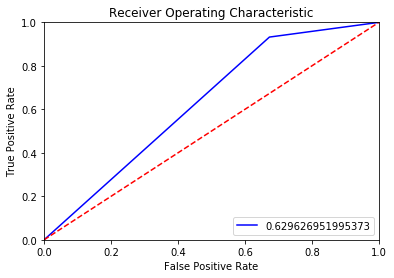

In [33]:
from sklearn import metrics
fpr, tpr,z = metrics.roc_curve(Y_test, Y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# cross-validation (tuning technique) - Logistic Regression

In [34]:
#Using cross validation

classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

#_______________________________________________________

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred_1=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

KFold(n_splits=10, random_state=None, shuffle=False)
[0.88372093 0.81395349 0.79069767 0.79069767 0.81395349 0.81395349
 0.74418605 0.60465116 0.79069767 0.61904762]
0.7665559246954595


In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred_1)
print(cfm)

print("Classification report : ")

print(classification_report(Y_test,Y_pred_1))

acc = accuracy_score(Y_test,Y_pred_1)
print("Accuracy of the model : ",acc)

[[ 20  32]
 [ 12 121]]
Classification report : 
              precision    recall  f1-score   support

           0       0.62      0.38      0.48        52
           1       0.79      0.91      0.85       133

    accuracy                           0.76       185
   macro avg       0.71      0.65      0.66       185
weighted avg       0.74      0.76      0.74       185

Accuracy of the model :  0.7621621621621621


# Decision Tree (Basic Model)

In [36]:
# Predicting using Decision_Tree_classifier
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state = 15, min_samples_leaf=5,max_depth=10)

#fit the model on the data and predict the value
model_DT.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

In [37]:
Y_pred = model_DT.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 0), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (1, 1), (1, 0), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 1), (1, 1), (1, 0), (1, 1), (0, 1), (0, 1), (1, 1), (1, 0), (0, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (1, 0), (0, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (1, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 0), (1, 1),

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report : ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model : ",acc)

[[ 24  28]
 [ 29 104]]
Classification report : 
              precision    recall  f1-score   support

           0       0.45      0.46      0.46        52
           1       0.79      0.78      0.78       133

    accuracy                           0.69       185
   macro avg       0.62      0.62      0.62       185
weighted avg       0.69      0.69      0.69       185

Accuracy of the model :  0.6918918918918919


# SVM [Support Vector Classification] (Basic Model) 

In [39]:
from sklearn import svm

svc_model = svm.SVC(kernel="rbf",C=10.0,gamma=0.001) 
svc_model.fit(X_train,Y_train)
Y_pred = svc_model.predict(X_test)
print(list(Y_pred))

[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [40]:
svc_model.score(X_train,Y_train)

0.7738927738927739

# cross-validation (tuning technique) - SVM

In [41]:
#Using cross validation
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

classifier=svm.SVC(kernel='rbf',C=1.0,gamma=0.1)
#classifier=KNeighborsClassifier(n_neighbors=11, metric='euclidean')
#classifier=svm.SVC(kernel='rbf',C=10.0,gamma=0.001)
#classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)
[0.86046512 0.8372093  0.86046512 0.79069767 0.79069767 0.79069767
 0.74418605 0.58139535 0.76744186 0.5952381 ]
0.7618493909191584


In [42]:
# Best fit model = SVM (Base Model)